### Semi Average Method

In [3]:
import pandas as pd

# Load your original dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/superstore.csv', encoding='unicode_escape')

# Filter rows where the category is "Furniture"
furniture_df = df[df['Category'] == 'Furniture']

# Create a new DataFrame with "Order Date" and "Sales" columns
result_df = furniture_df[['Order Date', 'Sales']]

# Save the result to a new CSV file
result_df.to_csv('furniture_sales.csv', index=False)


In [13]:
import pandas as pd

# Load your original dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/superstore.csv', encoding='unicode_escape')

# Filter rows where the category is "Furniture"
furniture_df = df[df['Category'] == 'Furniture']

# Convert 'Order Date' column to a datetime object
furniture_df['Order Date'] = pd.to_datetime(furniture_df['Order Date'])

# Extract the year from the 'Order Date' and add it as a new column
furniture_df['Year'] = furniture_df['Order Date'].dt.year

# Group by year and sum the sales values
yearly_sales = furniture_df.groupby('Year')['Sales'].sum().reset_index()

# Rename the columns for clarity
yearly_sales.columns = ['Year', 'Total Sales']

# Save the aggregated data to a CSV file
yearly_sales.to_csv('furniture_yearly_sales.csv', index=False)


<ipython-input-13-dff583a908ef>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  furniture_df['Order Date'] = pd.to_datetime(furniture_df['Order Date'])
<ipython-input-13-dff583a908ef>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furniture_df['Order Date'] = pd.to_datetime(furniture_df['Order Date'])
<ipython-input-13-dff583a908ef>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

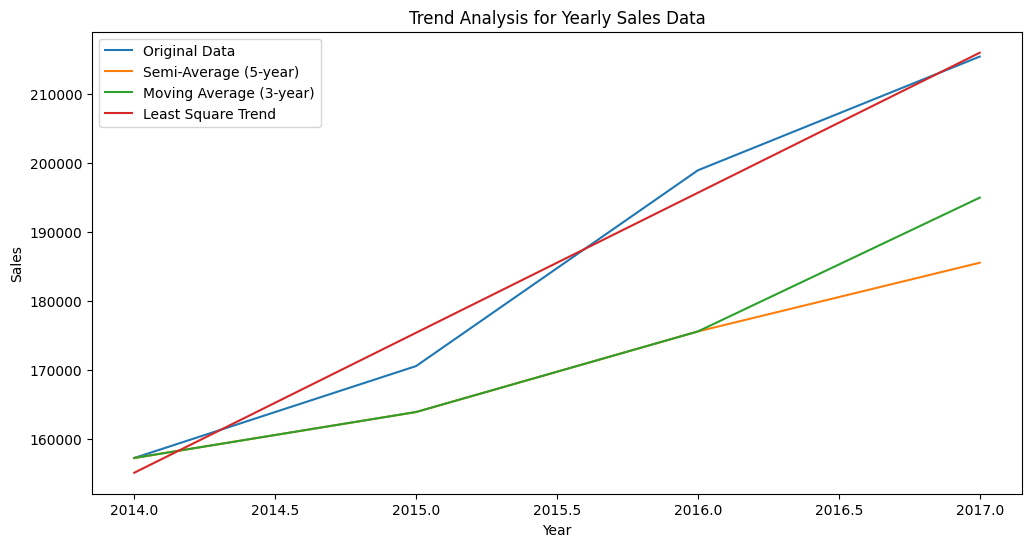

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your time series dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/furniture_yearly_sales.csv')

# Convert the date column to datetime if not already
# Note: This step is not needed if you have only 'Year' and 'Total Sales' columns.
# df['Year'] = pd.to_datetime(df['Year'], format='%Y')

def semi_average_trend(data, window_size):
    data['Semi-Average'] = data['Total Sales'].rolling(window=window_size, min_periods=1).mean()
    return data

def moving_average_trend(data, window_size):
    data['Moving Average'] = data['Total Sales'].rolling(window=window_size, min_periods=1).mean()
    return data

def least_square_trend(data):
    X = data['Year'].values.reshape(-1, 1)
    y = data['Total Sales'].values

    model = LinearRegression()
    model.fit(X, y)
    data['Least Square'] = model.predict(X)

    return data

window_size_semi_average = 5  # Choose an appropriate window size for Semi-Average (e.g., 3, 5, or 10)
window_size_moving_average = 3  # Choose an appropriate window size for Moving Average (e.g., 3, 5, or 10)

df = semi_average_trend(df, window_size_semi_average)
df = moving_average_trend(df, window_size_moving_average)
df = least_square_trend(df)

plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Total Sales'], label='Original Data')
plt.plot(df['Year'], df['Semi-Average'], label=f'Semi-Average ({window_size_semi_average}-year)')
plt.plot(df['Year'], df['Moving Average'], label=f'Moving Average ({window_size_moving_average}-year)')
plt.plot(df['Year'], df['Least Square'], label='Least Square Trend')
plt.title('Trend Analysis for Yearly Sales Data')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.show()


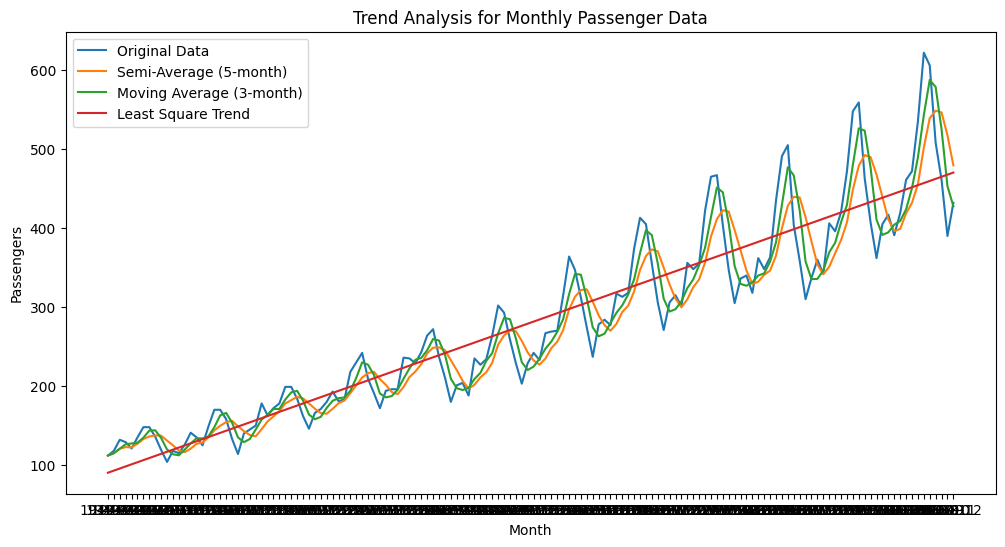

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your time series dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/airline-passengers.csv')

# Convert the date column to datetime if not already
# Note: This step is not needed if you have only 'Year' and 'Total Sales' columns.
# df['Year'] = pd.to_datetime(df['Year'], format='%Y')

def semi_average_trend(data, window_size):
    data['Semi-Average'] = data['Passengers'].rolling(window=window_size, min_periods=1).mean()
    return data

def moving_average_trend(data, window_size):
    data['Moving Average'] = data['Passengers'].rolling(window=window_size, min_periods=1).mean()
    return data

def least_square_trend(data):
    X = data.index.values.reshape(-1, 1)
    y = data['Passengers'].values

    model = LinearRegression()
    model.fit(X, y)
    data['Least Square'] = model.predict(X)

    return data

window_size_semi_average = 5  # Choose an appropriate window size for Semi-Average (e.g., 3, 5, or 10)
window_size_moving_average = 3  # Choose an appropriate window size for Moving Average (e.g., 3, 5, or 10)

df = semi_average_trend(df, window_size_semi_average)
df = moving_average_trend(df, window_size_moving_average)
df = least_square_trend(df)

plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Passengers'], label='Original Data')
plt.plot(df['Month'], df['Semi-Average'], label=f'Semi-Average ({window_size_semi_average}-month)')
plt.plot(df['Month'], df['Moving Average'], label=f'Moving Average ({window_size_moving_average}-month)')
plt.plot(df['Month'], df['Least Square'], label='Least Square Trend')
plt.title('Trend Analysis for Monthly Passenger Data')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()
